In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import skew, kurtosis, anderson
from scipy.stats import kstest, norm
import scipy.stats as stats
import math
from statsmodels.graphics.tsaplots import plot_acf


In [28]:
df_test= pd.read_parquet('data/data_storage/harmonic_ou_parquets/test_ou.parquet')
df_train = pd.read_parquet('data/data_storage/harmonic_ou_parquets/train_ou.parquet')
df_val = pd.read_parquet('data/data_storage/harmonic_ou_parquets/val_ou.parquet')

df = pd.concat([df_train, df_val, df_test], axis=0)

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.598216,0.514110,-0.292733,-0.053203,0.046078,-0.398476,-1.849714,1.251266,-0.119122,0.063903,...,-1.096567,-0.317864,0.591565,-0.406807,-0.268029,-0.235289,-0.782549,0.049298,0.842057,1.924754
1,-0.770470,-0.742787,-0.246988,0.806668,0.402140,-0.221638,0.245736,-1.431399,-0.549442,0.188026,...,-0.268689,-0.298045,1.383049,0.950467,1.475916,0.155848,0.451250,-2.175811,-0.680298,-1.036324
2,-0.826115,0.408308,0.310265,0.684580,-1.562932,-2.443145,0.009320,-1.071932,-0.285921,-0.185978,...,-0.831670,-0.307722,-0.253726,0.003095,-0.393909,-0.315028,-0.012064,-0.456948,-1.566878,-1.794107
3,-0.177922,1.066308,2.510430,2.760880,2.073000,1.226301,1.959101,3.242021,2.470312,2.178877,...,2.334459,2.166361,2.210328,2.982896,2.941736,2.035769,1.566861,4.285667,3.357505,1.560016
4,-0.435161,-0.922648,-1.113077,-0.146819,-0.611684,-1.640641,-1.074256,-1.436772,-0.682082,-0.019647,...,-2.391757,-0.209376,-0.056617,-0.925478,-0.632865,0.300591,-1.228591,-0.021487,-1.358213,-0.399220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,-0.553429,-1.249694,-0.231105,0.512736,0.090522,-0.888828,1.140559,0.004225,1.066059,0.487320,...,-0.539646,0.622353,-0.037367,0.703372,-0.384850,0.595368,1.064607,1.140499,-0.364874,0.622546
6246,-0.751300,-0.436542,-0.215457,0.894154,0.955577,0.170051,-0.125049,-1.506599,-0.533761,-0.340336,...,0.819176,-0.364474,0.160833,-0.844014,-0.073318,-1.716313,0.761459,0.375576,-0.597896,-0.071973
6247,-0.330740,0.112863,-1.106342,0.961391,1.175217,-0.521881,1.118350,-0.445609,0.893334,-0.843153,...,0.314988,0.126362,0.978453,0.283235,1.380542,0.488219,0.977104,0.753194,0.595283,0.719583
6248,0.236823,0.245848,-1.056901,-0.439726,0.851156,-0.133565,0.290552,-1.974373,-1.345912,-1.506101,...,-0.362852,-0.052539,-0.359036,-0.291875,-0.283647,-0.450088,-0.082063,-0.858270,-0.429283,-0.300981



###  Dataset Structure

Our dataset has shape (62,500, 80):
- Each row represents a separate synthetic time series sample.
- Each column corresponds to a time step.


We start our analysis by looking at the duplicates and null values and by checking if all the columns have same values.

In [30]:
print(df.duplicated().sum())

0


In [31]:
print(df.isnull().sum().unique())

0     0
1     0
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Length: 80, dtype: int64


In [32]:
print(df.dtypes.unique())

[dtype('float64')]


## Descriptive Statistics
This section summarizes the statistical properties of the time series values across the dataset.

We start by visualizing the global descriptive statistics.

In [33]:
print("Shape of dataset:", df.shape)

global_mean = df.values.mean()
global_std = df.values.std()
global_min = df.values.min()
global_max = df.values.max()
global_skew = skew(df.values.flatten())
global_kurtosis = kurtosis(df.values.flatten())

print(f"Global mean: {global_mean:.4f}")
print(f"Global std: {global_std:.4f}")
print(f"Min value: {global_min:.4f}")
print(f"Max value: {global_max:.4f}")
print(f"Skewness: {global_skew:.4f}")
print(f"Kurtosis: {global_kurtosis:.4f}")

Shape of dataset: (62500, 80)
Global mean: -0.0022
Global std: 1.2224
Min value: -5.8356
Max value: 6.0179
Skewness: -0.0084
Kurtosis: 0.0125


Then we go on visulaizing the descriptive statistics of each column separatelly. 

This reveals whether there are trends, drifts or non-stationarity over time and helps us to identify changes in variance or mean throughout the sequence.


In [34]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,...,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000
mean,0.006287,-0.000276,0.000667,-0.008921,-0.001030,-0.007830,-0.005843,-0.004059,-0.008001,-0.004625,...,-0.001164,-0.004298,-0.000619,-0.001422,0.002292,-0.000840,-0.002878,-0.002123,0.000790,-0.005436
std,0.998262,0.986372,1.186793,1.228545,1.231427,1.228583,1.232751,1.227635,1.232446,1.227962,...,1.227496,1.228162,1.224544,1.227612,1.230569,1.223023,1.224473,1.230365,1.229954,1.232238
min,-3.776906,-4.346016,-4.686601,-5.048227,-5.470955,-5.450611,-5.159262,-4.876339,-4.835648,-4.967004,...,-4.897091,-5.514587,-5.021680,-4.854652,-5.282214,-5.491471,-4.997889,-4.945689,-4.819168,-5.324636
25%,-0.669921,-0.668427,-0.802869,-0.835858,-0.826736,-0.840033,-0.834111,-0.828996,-0.833762,-0.833851,...,-0.827325,-0.836210,-0.825918,-0.820046,-0.823533,-0.822274,-0.827170,-0.825621,-0.831003,-0.830492
50%,0.007174,0.004773,0.006451,-0.000799,-0.003120,-0.005290,-0.000130,-0.006664,-0.003738,-0.000159,...,0.002080,-0.006165,-0.002613,-0.002265,0.004233,0.000704,0.001109,0.001399,0.006917,0.003763
75%,0.681761,0.666767,0.801951,0.817739,0.831895,0.819222,0.822636,0.821148,0.828417,0.826891,...,0.825769,0.830404,0.824755,0.823715,0.827182,0.825544,0.822789,0.832705,0.828609,0.823695
max,4.444764,4.455112,4.771491,5.264886,6.017902,5.222105,5.597697,5.405157,4.523526,4.914243,...,4.725630,4.973103,5.142366,5.929789,5.141145,5.159995,5.040034,5.635647,5.132714,5.441500


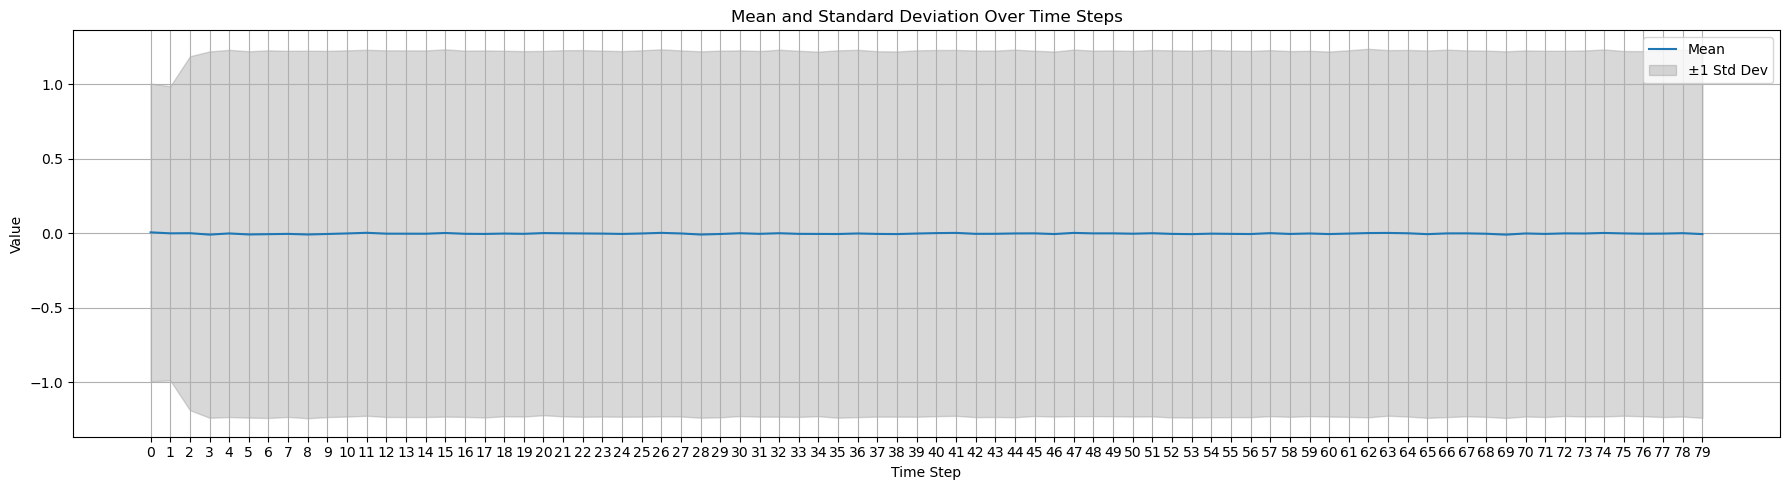

In [35]:
time_means = df.mean(axis=0)
time_stds = df.std(axis=0)
time_mins = df.min(axis=0)
time_maxs = df.max(axis=0)


plt.figure(figsize=(18, 5))
plt.plot(time_means, label='Mean')
plt.fill_between(range(len(time_means)),
                 time_means - time_stds,
                 time_means + time_stds,
                 color='gray', alpha=0.3, label='±1 Std Dev')
plt.title("Mean and Standard Deviation Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We see that all the columuns have similar mean and standard deviation, which makes sense since all the columns are generated in the same way.

## Visualize Time Series Structure
Let's have a look at how these time series look like. To do so we take three sample time series and we plot them.

In [36]:
colors = ['pink', 'lightblue', 'lightgreen']  
sample_indices = [20000,40000,60000]

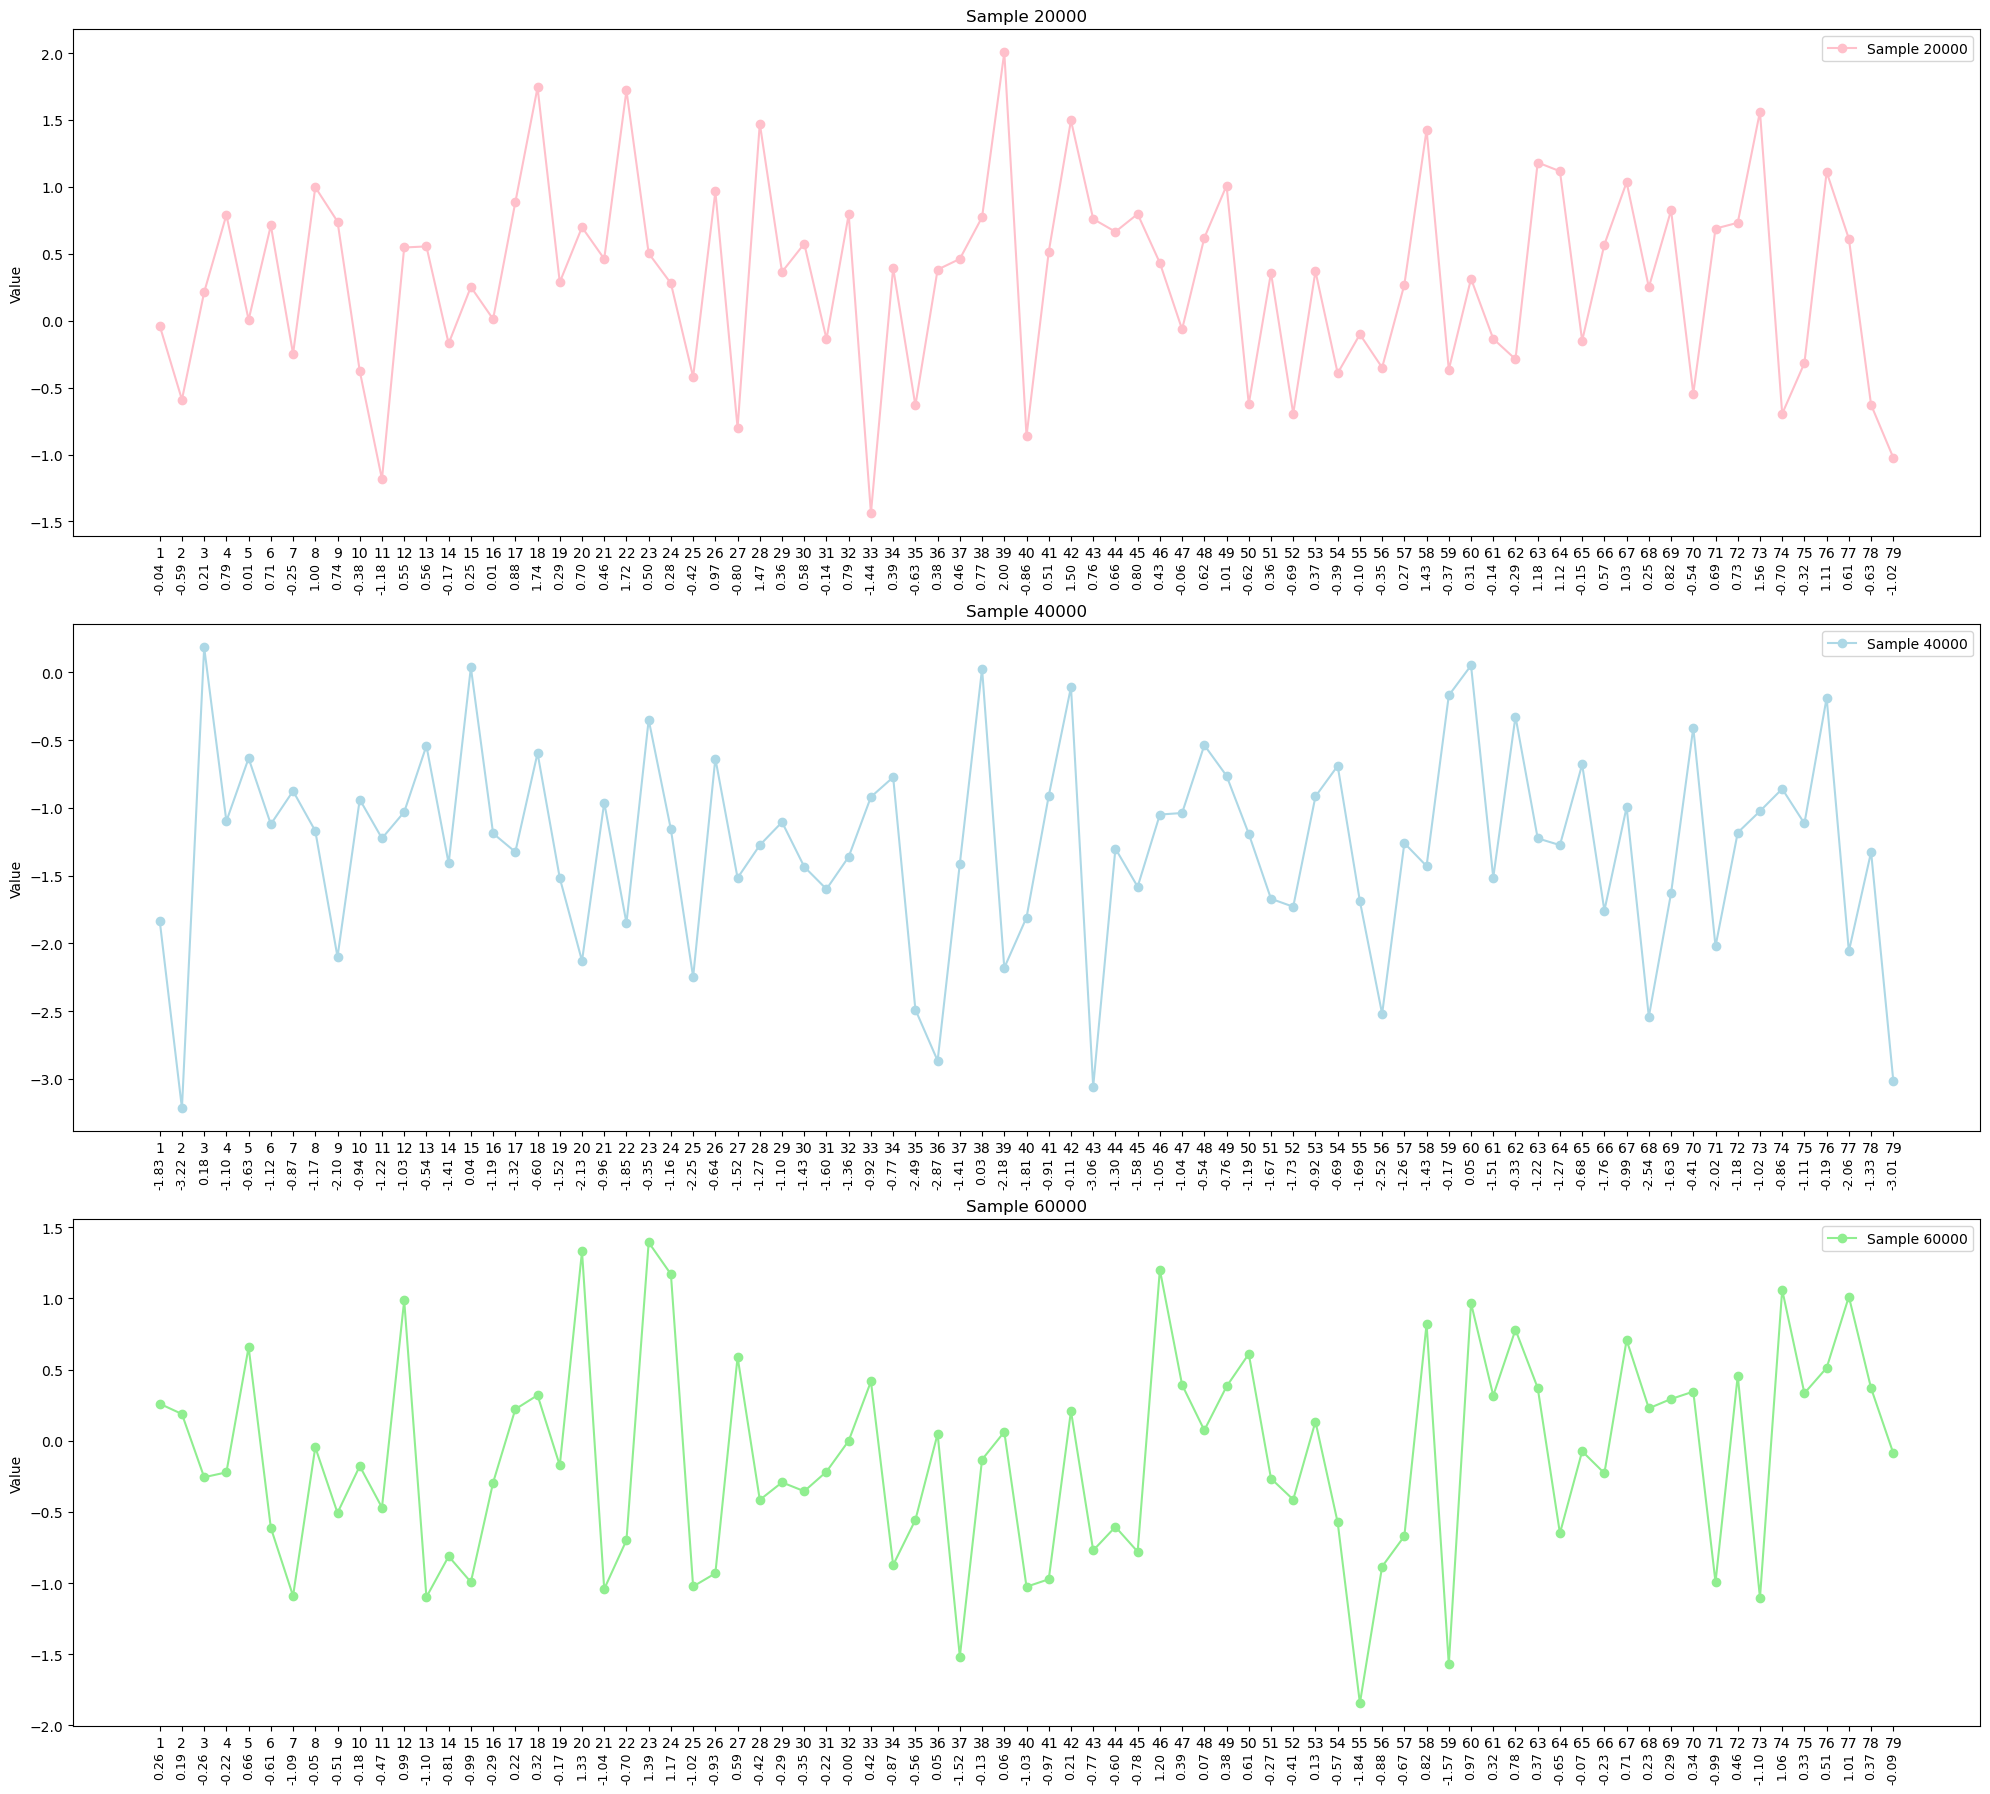

In [37]:
fig, axes = plt.subplots(len(sample_indices), 1, figsize=(20, 6 * len(sample_indices)))

for i, idx in enumerate(sample_indices):
    axes[i].plot(df.columns[1:], df.iloc[idx, 1:], label=f'Sample {idx}', color=colors[i], marker='o')
    axes[i].set_title(f'Sample {idx}')
    axes[i].set_ylabel('Value')
    axes[i].legend()

    x_positions = range(len(df.columns[1:]))
    numerical_values = df.iloc[idx, 1:].values
    for x, value in zip(x_positions, numerical_values):
        axes[i].text(x, axes[i].get_ylim()[0] - 0.05 * (axes[i].get_ylim()[1] - axes[i].get_ylim()[0]),
                     f'{value:.2f}', ha='center', va='top', fontsize=9, rotation=90)


plt.tight_layout()
plt.show()

## Distribution and Normality

We now look at the distribution of the columns and we see if this is normal.

We first start by plotting the ditribution of three sample columns through histograms and QQ-plots.

In [38]:
columns= [25,50,75]
sample_columns = [df.columns[i] for i in columns]


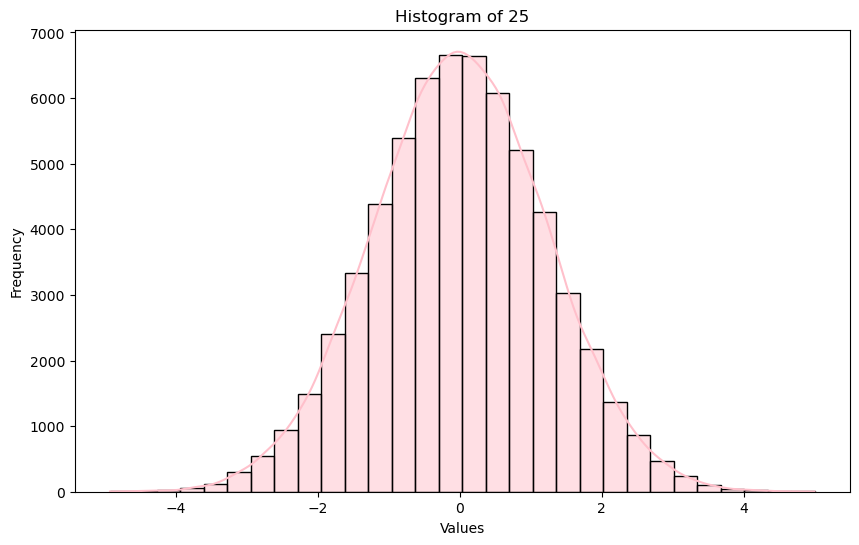

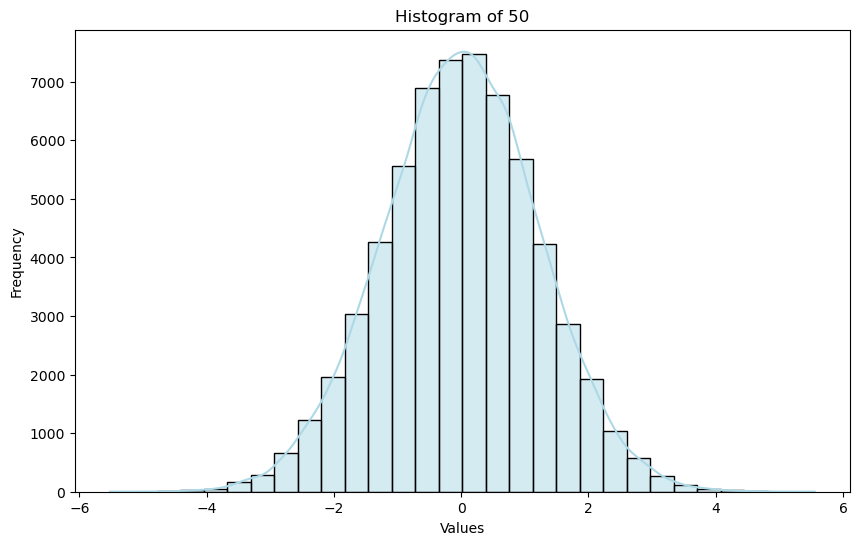

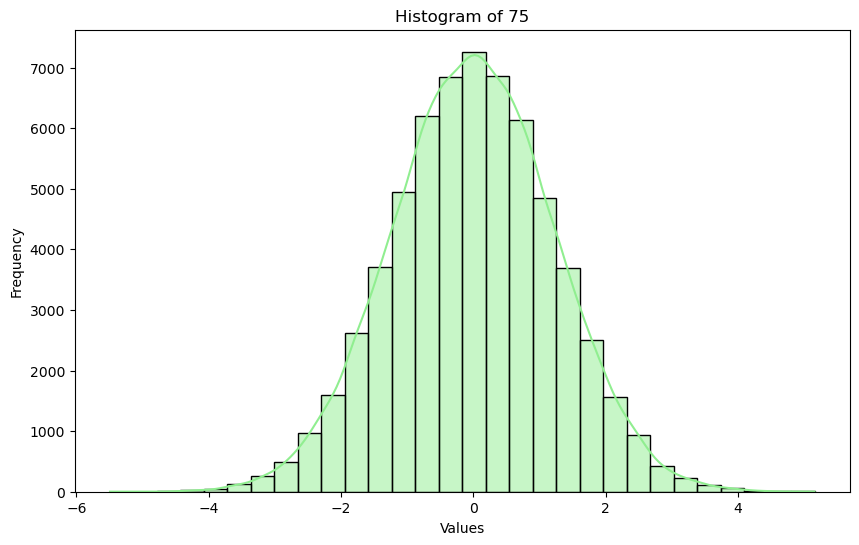

In [39]:
for i,idx in enumerate(sample_columns):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[idx], kde=True, color=colors[i], bins=30)
    plt.title(f"Histogram of {idx}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()


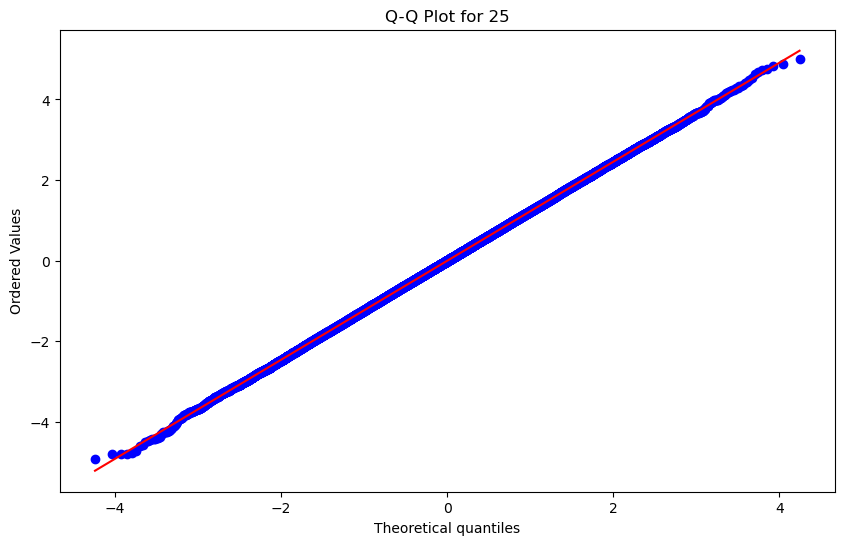

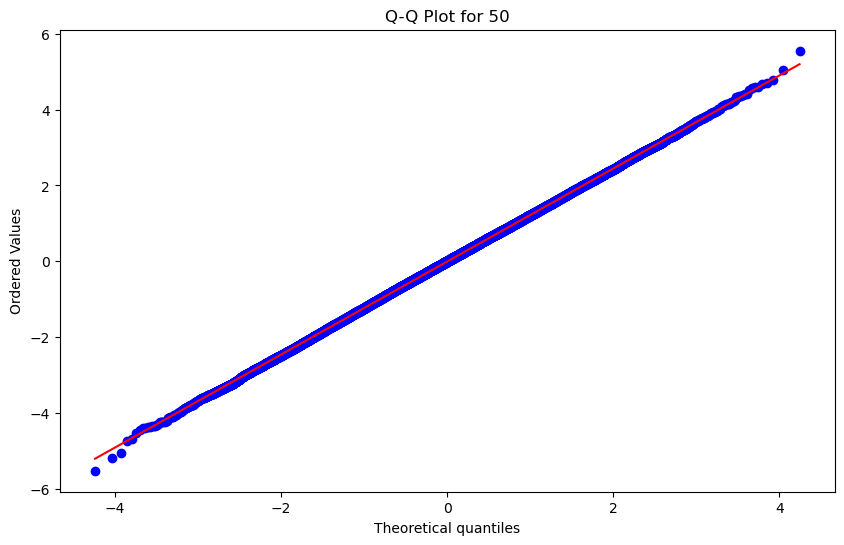

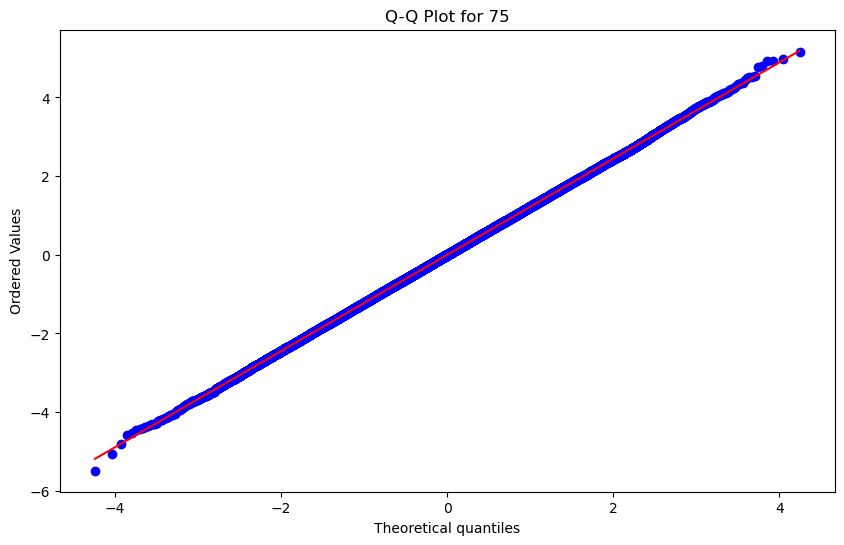

In [40]:
for idx in sample_columns:
    plt.figure(figsize=(10, 6))
    stats.probplot(df[idx], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {idx}")
    plt.show()

We then check normality with the Kolmogorov-Smirnov test.

In [41]:
normal_count = 0
for idx in df.columns:
    mean, std = df[idx].mean(), df[idx].std()
    stat, p_value = kstest(df[idx], 'norm', args=(mean, std))
    if p_value > 0.05:
        normal_count += 1

print(f"Number of normally distributed columns: {normal_count}/{len(df.columns)}")

Number of normally distributed columns: 80/80


According to this test all the columns are normally distributed. This is expected since our data was generated using a normal distribution.

## Autocorrelation

We now take a look at the autocorrelation for three sample time series from our dataset.

Autocorrelation measures how a time series is related to its past values. If there's a strong autocorrelation at certain lags, it means that past values influence future ones — which can be useful for forecasting or understanding patterns in the data.

In the plots below, we use the autocorrelation function to check this. For each time series, we look at up to 20 lags to see how strongly each point is correlated with its previous values.

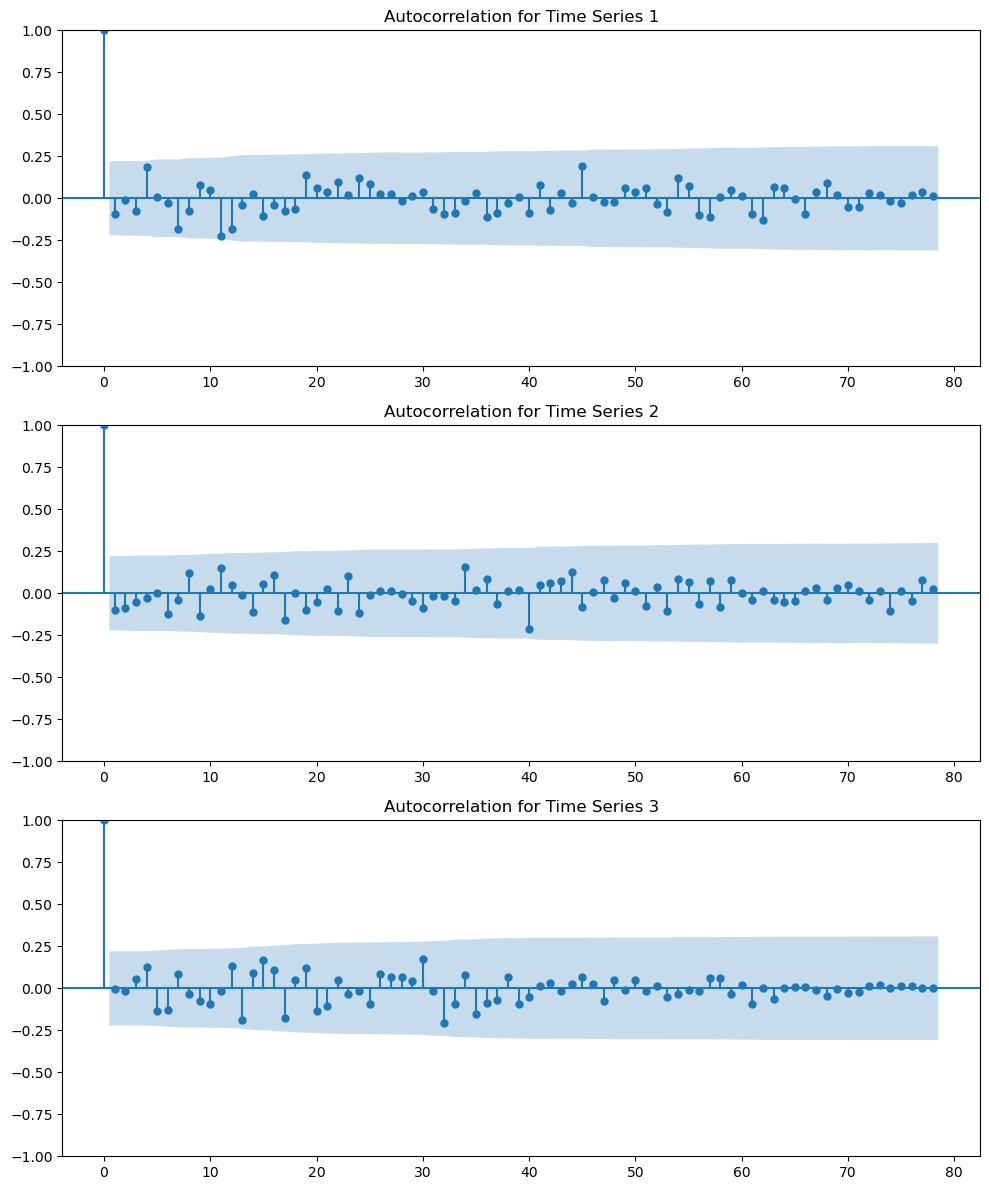

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
selected_series = df.iloc[sample_indices, 1:]

for i, series in enumerate(selected_series.values):
    ax = axes[i]

    plot_acf(series, ax=ax, lags=78)  
    ax.set_title(f'Autocorrelation for Time Series {i + 1}')

plt.tight_layout()
plt.show()


In each plot:

- The **bars** represent the correlation of the time series with its past values (lags).
- The **shaded area** is the confidence interval. If a bar rises above or drops below this shaded region, it means that the correlation at that lag is statistically significant

So, if you see bars outside the shaded area, the time series has a meaningful relationship with its past at those lags. If all bars stay within the shaded area, the time series is likely more random or has very weak autocorrelation.

In our case, we don’t observe any significant correlation except with the immediately preceding value. The high level of randomness in this data makes it particularly difficult to predict, as there are no clear patterns or temporal dependencies to exploit.